In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.tree import DecisionTreeClassifier

In [3]:
df_train=pd.read_csv('/kaggle/input/titanic/train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_test=pd.read_csv('/kaggle/input/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
df_train=df_train.drop(columns=['Name','Ticket','Cabin','PassengerId'])


KeyError: "['Name', 'Ticket', 'Cabin', 'PassengerId'] not found in axis"

In [60]:
df_test=df_test.drop(columns=['Name','Ticket','Cabin','PassengerId'])

In [6]:
df_train.duplicated().sum()

111

In [7]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [74]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

/tmp/ipykernel_198/3497109333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)


In [77]:
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)

In [9]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [10]:
df_train=df_train.dropna(subset=['Embarked'])

In [11]:
df_train.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Note 1=Survived, 0=not

<Axes: xlabel='Sex', ylabel='count'>

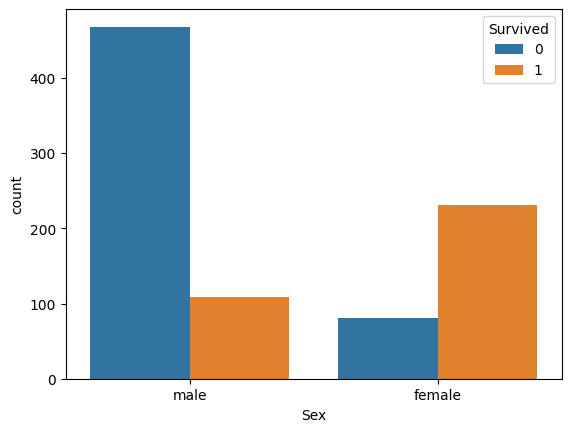

In [12]:
sns.countplot(x='Sex',hue='Survived',data=df_train)

The above diagram shows that the gender of a person is one of the major indicating factors of survival

<Axes: xlabel='Pclass', ylabel='count'>

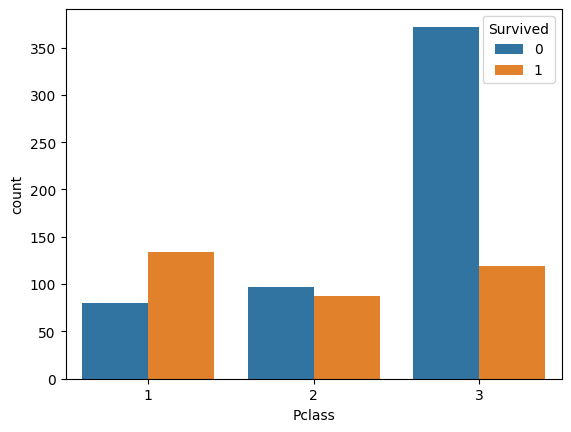

In [13]:
sns.countplot(x='Pclass',hue='Survived',data=df_train)

The above diagram show that a class 1 are likley to survive whereas the survival rate of class 3 people are very slim

In [14]:
df_train.pivot_table(index='Survived',values=['Age','SibSp','Parch','Fare'])



,Age,Fare,Parch,SibSp
Survived,,,,
0,30.4151,22.117887,0.329690,0.553734
1,28.4236,48.209498,0.467647,0.476471


In [15]:
df_train.pivot_table(index='Survived',columns='Pclass',values='Fare',aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,134,87,119


In [22]:
df_train['Sex'] = df_train['Sex'].replace({'male':  0, 'female':  1})
df_train.head()

/tmp/ipykernel_198/3511474597.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Sex'] = df_train['Sex'].replace({'male':  0, 'female':  1})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [55]:
df_test['Sex'] = df_test['Sex'].replace({'male':  0, 'female':  1})

/tmp/ipykernel_198/3712531802.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Sex'] = df_test['Sex'].replace({'male':  0, 'female':  1})


In [23]:
df_train['Embarked']=df_train['Embarked'].replace({'S':0,'C':1,'Q':2})
df_train.head()

/tmp/ipykernel_198/2582561285.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Embarked']=df_train['Embarked'].replace({'S':0,'C':1,'Q':2})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [56]:
df_test['Embarked']=df_test['Embarked'].replace({'S':0,'C':1,'Q':2})
df_test.head()

/tmp/ipykernel_198/17118240.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Embarked']=df_test['Embarked'].replace({'S':0,'C':1,'Q':2})


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [64]:
#splitting labeled and features into X and y
X_train=df_train.iloc[:,1:]; y_train=df_train.iloc[:,0:1]

In [65]:
X.shape

(889, 7)

In [66]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [67]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [68]:
X_test=df_test

In [72]:
X_train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [76]:
X_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [69]:
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [70]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [78]:
#Using Decision Tree
DTC=DecisionTreeClassifier(random_state=42)
DTC.fit(X_train,y_train)
y_dtc_predict_train=DTC.predict(X_train)
y_dtc_predict_test=DTC.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score_train=accuracy_score(y_train,y_dtc_predict_train)
accuracy_score_train

0.9820022497187851

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [82]:
new_df=pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/titanic-dataset/Titanic-Dataset.csv'